In [208]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
df = pd.read_csv('data_2.csv')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null object
LoanAmount           594 non-null object
Loan_Amount_Term     602 non-null object
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 62.4+ KB


In [210]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1.0,Urban,Y


# EDA
## Target

In [211]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [110]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
sum(df['Loan_Status'])/len(df['Loan_Status'])

0.6872964169381107

- 대출승인이 된 고객 전체의 약 69%이다.

## Categorical var

In [111]:
cat_cols = [col for col in df.columns if df[col].dtypes in ['object']]

In [112]:
cat_cols = cat_cols[1:]

In [223]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [226]:
stats.ttest_ind(df.ApplicantIncome[df['Loan_Status']==1],df.ApplicantIncome[df['Loan_Status']==0])

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [232]:
m1 = df.ApplicantIncome[df['Loan_Status']==1]
m2 = df.ApplicantIncome[df['Loan_Status']==0]

In [245]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [258]:
m1 = df[df['Education']=='Graduate']
m2 = df[df['Education']=='Not Graduate']
m1_ = random.sample(list(m1['Loan_Status']),100)
m2_ = random.sample(list(m1['Loan_Status']),100)


In [259]:
stats.ttest_ind(m1_, m2_)

Ttest_indResult(statistic=-1.0632524204650533, pvalue=0.2889625204849238)

In [252]:
stats.ttest_ind(male_sample_mean,female_sample_mean)

/home/vips/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/vips/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

# getting 50 random sample for male and female. 
import random
male_sample = random.sample(list(male['Survived']),50)
female_sample = random.sample(list(female['Survived']),50)

# Taking a sample means of survival feature from male and female
male_sample_mean = np.mean(male_sample)
female_sample_mean = np.mean(female_sample)


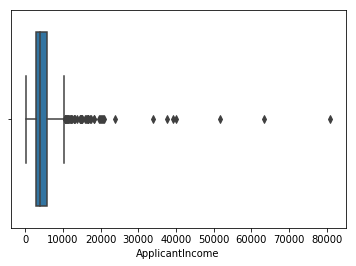

In [228]:
sns.boxplot(df['ApplicantIncome'])

In [ ]:
def ratio_plot(col):
    plt.subplots(figsize=(13,4))
    ratio = (df[df['y']==1][col].value_counts())/df[col].value_counts()
    ratio.plot(kind='bar',stacked=True)
    plt.title('Y ~ ratio')
    plt.show()
for col in cat_cols:
    plt.subplots(figsize=(13,4))
    print('='*30+str(col)+'='*30)

In [284]:
def ratio_plot(col):
    ratio = (df[df['Loan_Status']==1][col].value_counts())/df[col].value_counts()
    ratio.plot(kind='bar',stacked=True)
    plt.title=('ratio_plot')
    plt.show()

결측값 : 13   고유값['Male' 'Female' nan]


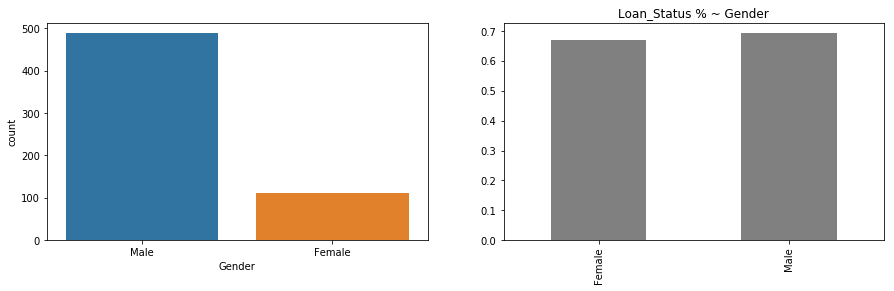

결측값 : 3   고유값['No' 'Yes' nan]


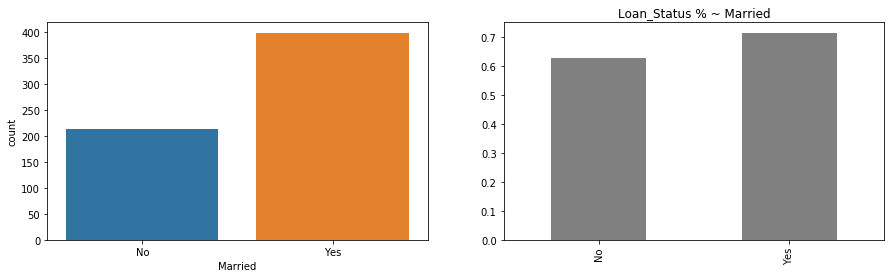

결측값 : 15   고유값['0' '1' '2' '3+' nan]


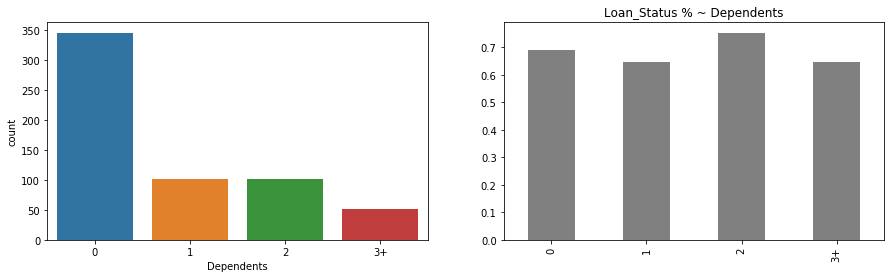

결측값 : 0   고유값['Graduate' 'Not Graduate']


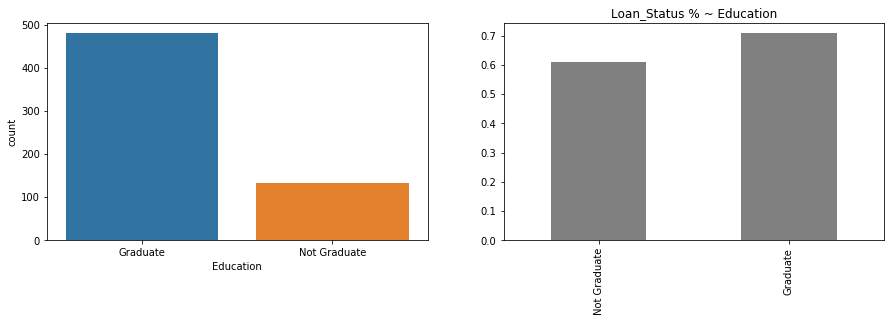

결측값 : 32   고유값['No' 'Yes' nan]


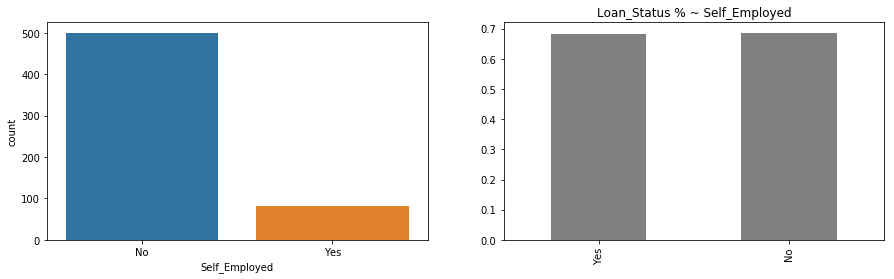

결측값 : 12   고유값['360' '120' '240' 'Null' nan '180' '60' '300' '480' '36' '84' '12']


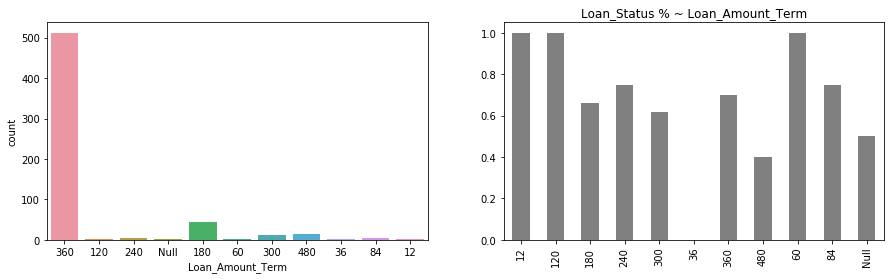

결측값 : 0   고유값['Urban' 'Rural' 'Semiurban']


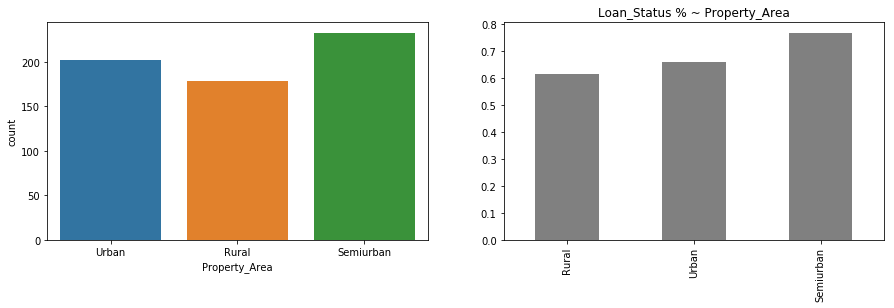

In [314]:
for col in cat_cols:
    f, ax = plt.subplots(1,2,figsize=(15,4))
    sns.countplot(col,data=df,ax=ax[0])
    print('결측값 : ' + str(df[col].isnull().sum()) ,'  고유값' + str(df[col].unique()))
    ratio = (df[df['Loan_Status']==1][col].value_counts(ascending=True))/df[col].value_counts(ascending=True)
    ratio.plot(kind='bar',stacked=True,ax=ax[1],title='Loan_Status % ~ '+str(col),color='gray')
    plt.show()

In [260]:
stats.f_oneway(df['Loan_Status'][df['Property_Area']=='Urban'], df['Loan_Status'][df['Property_Area']=='Semiurban'],
               df['Loan_Status'][df['Property_Area']=='Rural'])

F_onewayResult(statistic=6.243824207425567, pvalue=0.002068617689238754)

In [266]:
stats.ttest_ind(df['Loan_Status'][df['Property_Area']=='Urban'], df['Loan_Status'][df['Property_Area']=='Semiurban'])

Ttest_indResult(statistic=-2.549782648856051, pvalue=0.011122570192444378)

In [113]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Married'] = df['Married'].map({'No':0,'Yes':1})
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':3})

CoapplicantIncome,LoanAmount -> 연속형변수 , Loan_Amount_Term -> Null?? nan??

In [114]:
df[df['Loan_Amount_Term']=='Null']
# 일단 -1 처리하자 추후 NA랑 같이 추정!!!!!!
df.loc[df['Loan_Amount_Term']=='Null','Loan_Amount_Term'] = -1
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(float)

In [115]:
cat_cols = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Property_Area']

## numeric 변수

In [116]:
num_cols = [col for col in df.columns if df[col].dtypes in ['int',float]]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null float64
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null object
LoanAmount           594 non-null object
Loan_Amount_Term     602 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 62.4+ KB


In [118]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']

In [119]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vips/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


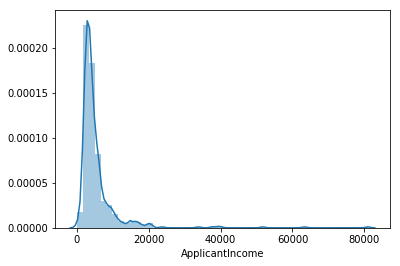

In [75]:
sns.distplot(df['ApplicantIncome'])

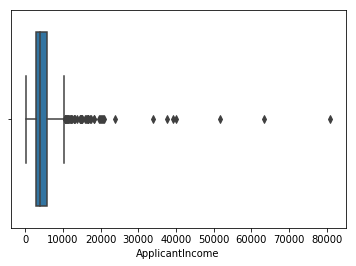

In [77]:
sns.boxplot(df['ApplicantIncome'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           548 non-null float64
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null object
LoanAmount           594 non-null object
Loan_Amount_Term     602 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(6), int64(4), object(3)
memory usage: 62.4+ KB


많은 아웃라이어와 왼쪽으로 치우쳐진 분포를 이루고 있음 사회의 소득 불균형 때문으로 예상
- 소득 vs 교육, 성별, 결혼, 부양자수, 자영업등과 한번 봐보자

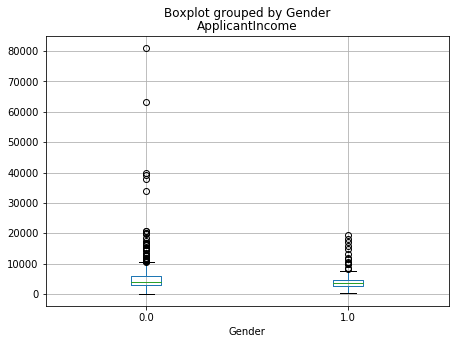

In [86]:
df.boxplot (column = 'ApplicantIncome', by = 'Gender',figsize=(7,5))

큰차이는 없지만 소득이 매우높은 아웃라이어는 남성이 분포

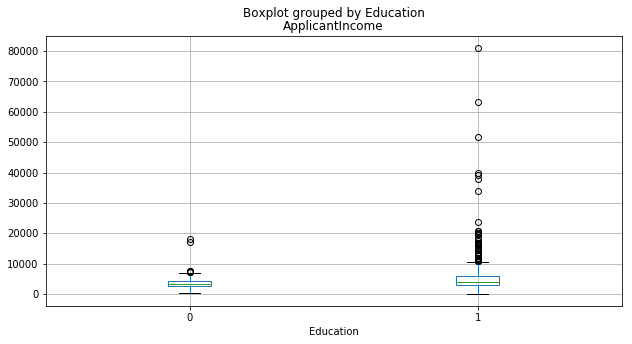

In [89]:
df.boxplot (column = 'ApplicantIncome', by = 'Education',figsize=(10,5))

큰차이는 없지만 소득이 매우높은 아웃라이어는 교육자가 분포

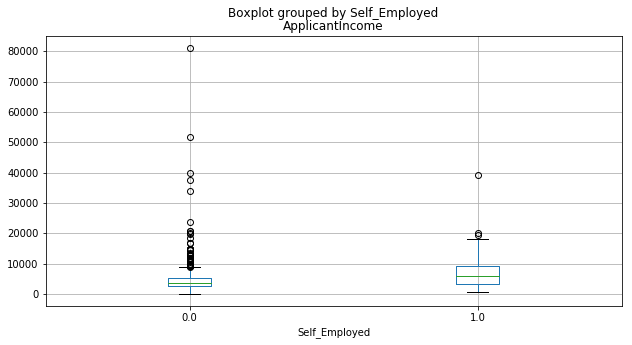

In [93]:
df.boxplot (column = 'ApplicantIncome', by = 'Dependents',figsize=(10,5))

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null float64
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    609 non-null float64
LoanAmount           594 non-null object
Loan_Amount_Term     602 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(7), int64(4), object(2)
memory usage: 62.4+ KB


# Missing value

### CoapplicantIncome

In [120]:
df.loc[df.CoapplicantIncome=='Null','CoapplicantIncome']=None
df.CoapplicantIncome = df.CoapplicantIncome.astype(float)

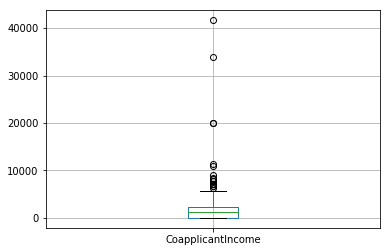

In [105]:
df.boxplot(column = 'CoapplicantIncome')

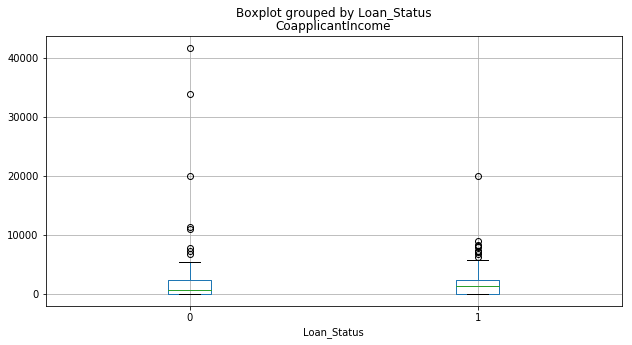

In [104]:
df.boxplot(column = 'CoapplicantIncome', by = 'Loan_Status',figsize=(10,5))

0에 많이 분포되있고 공동수입이 생길라면 dependents가 있어야 하지 않나?
- 확인해보자

In [122]:
df.Dependents.unique()

array([ 0.,  1.,  2.,  3., nan])

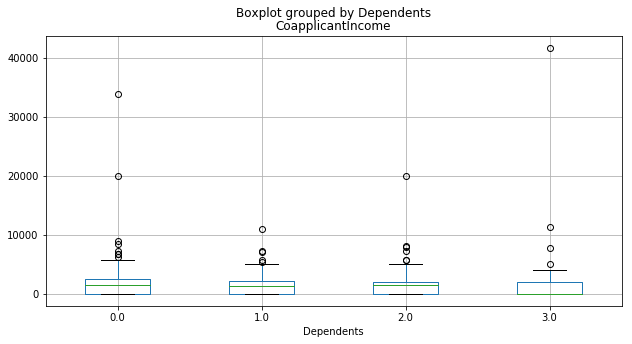

In [123]:
df.boxplot(column = 'CoapplicantIncome', by = 'Dependents',figsize=(10,5))

In [128]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.369612,-0.175970,0.049258,0.009829,-0.053989,-0.082158,0.079940,-0.016337,0.097712,-0.019857
Married,-0.369612,1.000000,0.343417,-0.014223,0.001909,0.051332,0.074010,-0.111526,0.004381,0.002632,0.089280
Dependents,-0.175970,0.343417,1.000000,-0.059161,0.057867,0.118679,0.028532,-0.082866,-0.050082,0.000511,0.006781
Education,0.049258,-0.014223,-0.059161,1.000000,0.012333,0.140760,0.060760,0.086822,0.081822,0.017175,0.085884
Self_Employed,0.009829,0.001909,0.057867,0.012333,1.000000,0.140826,-0.007166,-0.032554,0.003883,0.015044,-0.002303
ApplicantIncome,-0.053989,0.051332,0.118679,0.140760,0.140826,1.000000,-0.116715,-0.036961,-0.014715,-0.010507,-0.004710
CoapplicantIncome,-0.082158,0.074010,0.028532,0.060760,-0.007166,-0.116715,1.000000,-0.075416,-0.003197,-0.031797,-0.058345
Loan_Amount_Term,0.079940,-0.111526,-0.082866,0.086822,-0.032554,-0.036961,-0.075416,1.000000,0.019195,0.090921,-0.013435
Credit_History,-0.016337,0.004381,-0.050082,0.081822,0.003883,-0.014715,-0.003197,0.019195,1.000000,0.040615,0.561678
Property_Area,0.097712,0.002632,0.000511,0.017175,0.015044,-0.010507,-0.031797,0.090921,0.040615,1.000000,0.118686


In [130]:
sum(df.CoapplicantIncome==0)

268

신기하다 Dependents랑 공동수익은 관계가 없어 보인다 -> 오히려 Dependents랑 결혼유무랑 관계가 있네...
- 다른변수와도 관계가없고 결측값이 5개 이고 0이 268개로 너무많으므로 그냥 mode로 채우자

In [131]:
df['CoapplicantIncome'].fillna(0,inplace=True)

### Loan_Amount

In [134]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     12
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
df['LoanAmount'].unique()

array([nan, '128', '66', '120', '141', '267', '95', '158', '168', '349',
       '70', '109', '200', '114', '17', '125', '100', '76', '133', '115',
       '104', '315', '116', '112', '151', '191', '122', '110', '35',
       '201', '74', '106', '320', '144', '184', '80', '47', '75', '134',
       '96', '88', '44', '286', '97', '135', '180', '99', '165', '258',
       '126', '312', '136', '172', '81', '187', '113', '176', '130',
       '111', '167', '265', '50', '210', '175', '131', '188', '25',
       'Null', '137', '160', '225', '216', '94', '139', '152', '118',
       '185', '154', '85', '259', '194', '93', '370', '182', '650', '102',
       '290', '84', '242', '129', '30', '244', '600', '255', '98', '275',
       '121', '63', '700', '87', '101', '495', '67', '73', '260', '108',
       '58', '48', '164', '170', '83', '90', '166', '124', '55', '59',
       '127', '214', '240', '72', '60', '138', '42', '280', '140', '155',
       '123', '279', '192', '304', '330', '150', '207', '436', '7

In [142]:
df[df['LoanAmount']=='Null']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,0.0,0.0,0.0,1,NaN,6782,0.0,Null,360.0,NaN,0,0
103,LP001356,0.0,1.0,0.0,1,0.0,4652,3583.0,Null,360.0,1.0,3,1


Null이 있다 이건 뭐지 결측값이랑 다른가 한번 비교해보기 위해 일단 -1로 치환하자

In [215]:
df.loc[df['LoanAmount']=='Null','LoanAmount']=-1
df['LoanAmount'] = df['LoanAmount'].astype('float')

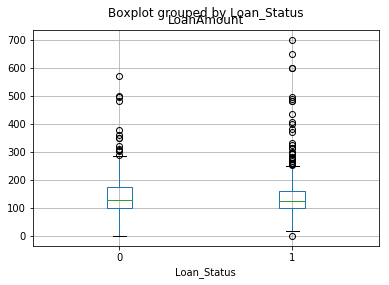

In [216]:
df.boxplot('LoanAmount',by= 'Loan_Status')

특별한 차이가 안보인다 
- 상관관계찍자

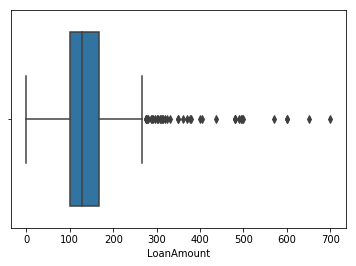

In [217]:
sns.boxplot(df['LoanAmount'])

In [218]:
df.corr()['LoanAmount']

ApplicantIncome    0.567750
LoanAmount         1.000000
Credit_History    -0.009793
Loan_Status       -0.034618
Name: LoanAmount, dtype: float64

대체로 고객정보랑 약한 상관관계가 있고 고객수입이랑 상관관계과 꽤있다

/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


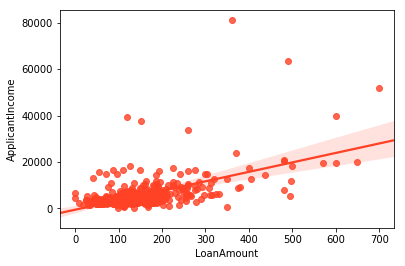

In [221]:
sns.regplot(x="LoanAmount",y="ApplicantIncome",data=df,color='#ff4125')

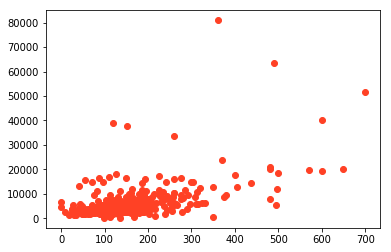

In [219]:
plt.scatter(x="LoanAmount",y="ApplicantIncome",data=df,color='#ff4125')

/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vips/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


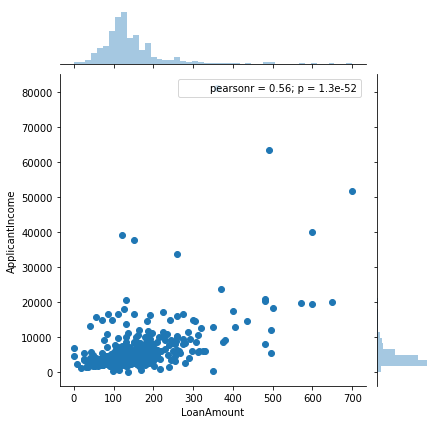

In [194]:
sns.jointplot(x='LoanAmount',y='ApplicantIncome',data=df)

- LoanAmount 결측값을 예측하는 방법을 쓰고 싶지만 시간과 데이터라이브러리 한계로 하지못할것 같다. 
    - 그나마 사용할수 있는 범주형 변수간의 관계를 이용해 결측값을 추정보자
    - 가정 ) 교육수준과 자영업자일 수록 대출금액이 높을것이다


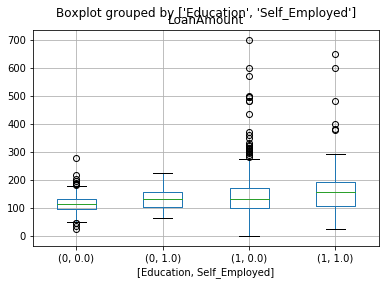

In [165]:
df.boxplot('LoanAmount',by= ['Education','Self_Employed'])

- 중앙값을보면 교육을 했고, 자영업자일 수록 LoanAmount가 높다! 이걸로 추정할수 있다
    - 하지만 일단 Education과 자영업자에 결측값이 있어서는 안된다

In [168]:
df['Self_Employed'].value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [169]:
# 자영업자가 아닌비율이 압도적으로 많다 -최빈값대체
df [ 'Self_Employed']. fillna ( 0.0, inplace = True)

In [179]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [222]:
table

Education,0,1
Self_Employed,,
0.0,113.0,130.0
1.0,130.0,157.5


## Gender Married Dependents

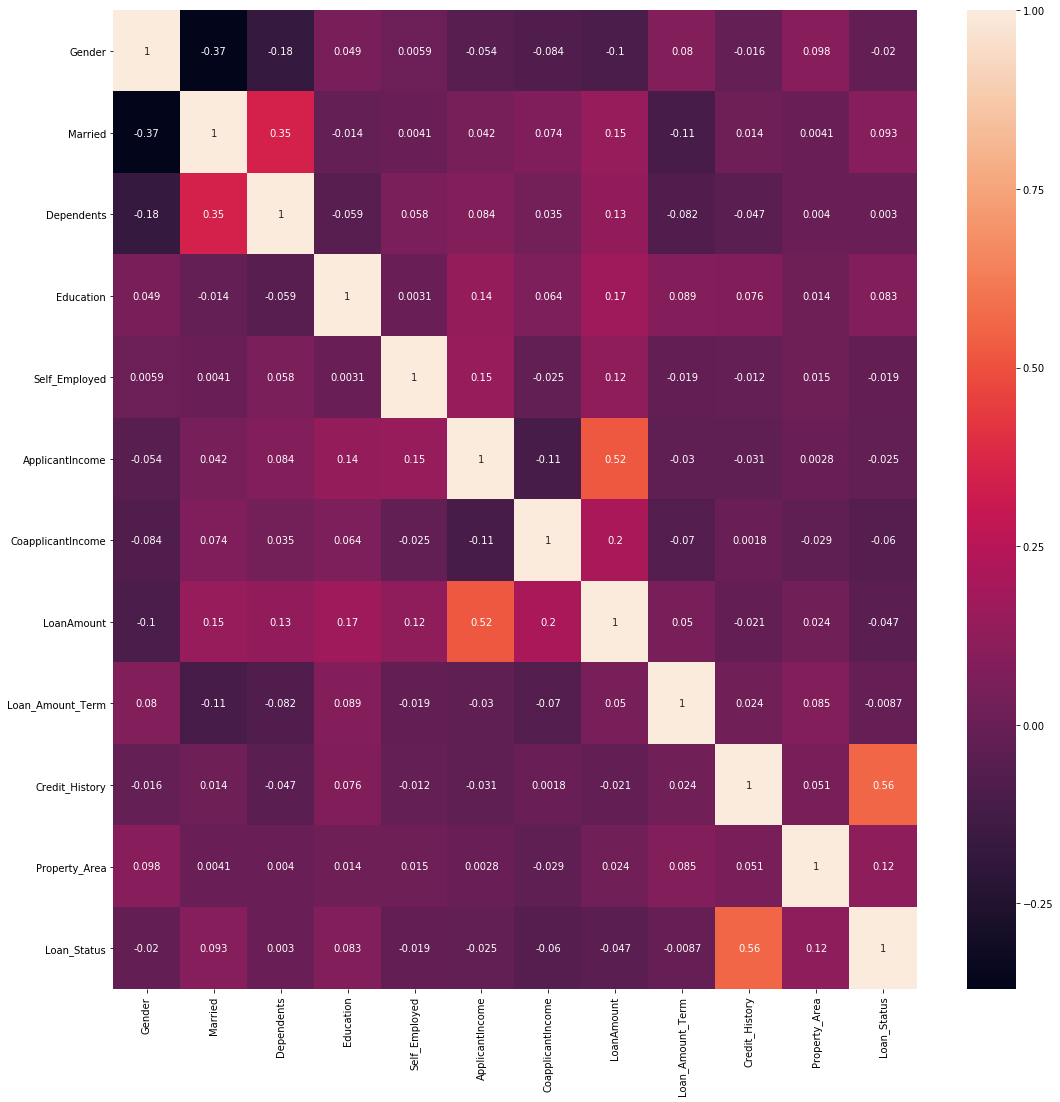

In [180]:
df_c = df[df.Gender.notnull()].copy()
df_c.Gender = df_c.Gender.astype('int64')
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df_c.corr(), ax = ax, annot = True)

남자든 여자든 상관관계가 없다 깔끔! -> 최빈값으로 대체

In [183]:
df.Gender = df.Gender.fillna(df.Gender.mode()[0])
df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0])
df.Married = df.Married.fillna(df.Married.mode()[0])

In [182]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     12
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

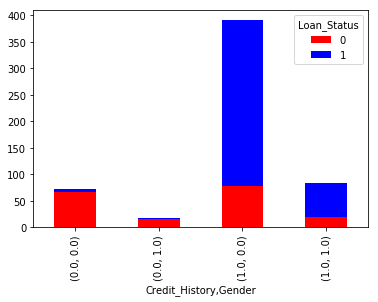

In [184]:
temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

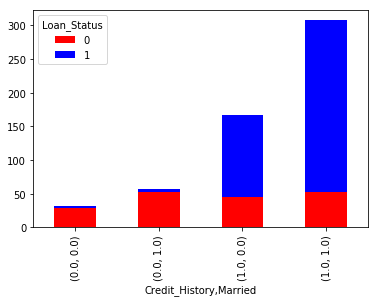

In [185]:
temp3 = pd.crosstab([df['Credit_History'],df['Married']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

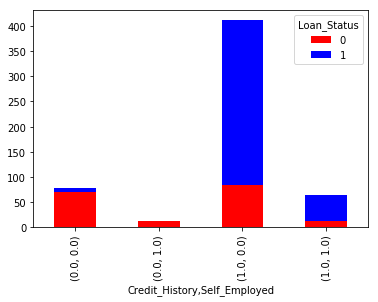

In [187]:
temp3 = pd.crosstab([df['Credit_History'],df['Self_Employed']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null float64
Married              614 non-null float64
Dependents           614 non-null float64
Education            614 non-null int64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     602 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(8), int64(4), object(1)
memory usage: 62.4+ KB


/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: Invalid linestyle '---'; see docs of Line2D.set_linestyle for valid values

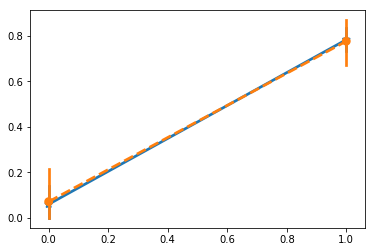

In [192]:
sns.pointplot(x="Credit_History", y="Loan_Status", hue="Dependents", data=df,
              markers=["*", "o",'='], linestyles=["-", "--",'---']);